# Multi-target tracking

Quantum computing has the potential to revolutionize certain computational tasks, and multi-target tracking is no exception. Leveraging quantum computing for multi-target tracking involves exploiting quantum algorithms to enhance the efficiency of computations that are challenging for classical computers. Let's break down how quantum computing can be applied to multi-target tracking using tensor decomposition of a probability function, Bayesian prediction, and the Fokker-Planck equation (FPE).

1. **Tensor Decomposition of Probability Function (PDF):**
   - **Quantum Parallelism:** Quantum computing can perform parallel computations on all possible combinations of states simultaneously. This is particularly advantageous for tensor decomposition, where the quantum superposition allows for the exploration of multiple combinations at once.
   - **Quantum Tensor Networks:** Quantum computers can efficiently handle large-scale tensor operations, which are common in the decomposition of high-dimensional probability functions. Quantum tensor networks can represent and manipulate complex probability distributions more efficiently than classical methods.

2. **Bayesian Prediction:**
   - **Quantum Bayesian Networks:** Quantum computing can be used to represent and manipulate Bayesian networks more efficiently than classical systems. Quantum Bayesian networks can handle the probabilistic dependencies between different variables in a way that exploits quantum superposition and entanglement.
   - **Quantum Sampling:** Quantum computers can sample from probability distributions more efficiently than classical computers, which is a crucial aspect of Bayesian prediction. This can accelerate the process of generating samples for Bayesian inference.

3. **Bayesian Update Cycle:**
   - **Quantum Bayesian Inference:** Quantum algorithms, such as quantum Bayesian networks and quantum versions of Markov Chain Monte Carlo (MCMC) algorithms, can be employed to update the probability distribution over time as new information becomes available. This enables a more efficient Bayesian update cycle compared to classical methods.

4. **Fokker-Planck Equation (FPE):**
   - **Quantum Simulation:** Quantum computers can simulate the time evolution described by the Fokker-Planck equation more efficiently than classical computers for certain systems. This allows for a quantum-enhanced understanding of the time evolution of the state in the context of multi-target tracking.
   - **Quantum Walks:** Quantum walks, a quantum analogue of classical random walks, can be used to model and simulate the evolution of probabilities over time. This can be advantageous for understanding the dynamics described by the Fokker-Planck equation.

In summary, by harnessing the unique properties of quantum computing, such as superposition, entanglement, and quantum parallelism, it is possible to enhance the efficiency of computations involved in tensor decomposition, Bayesian prediction, and the Fokker-Planck equation. This, in turn, can lead to more effective and faster multi-target tracking algorithms in certain scenarios. However, it's important to note that as of my last knowledge update in January 2022, practical and large-scale quantum computers are still in the early stages of development, and their application to specific problems may be limited by factors such as error rates and decoherence.

# 1. Simple bayesian prediction
 In this example, let's consider a simple scenario where we are tracking the position of a target along a one-dimensional line. We'll use a Gaussian distribution to represent the probability distribution over possible positions. The target undergoes a simple constant velocity motion.

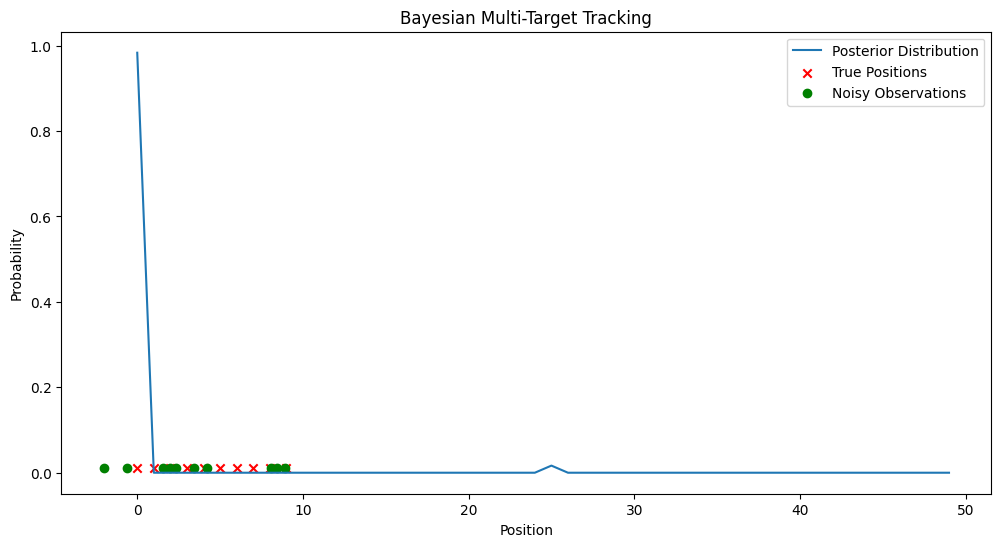

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def initial_state(num_positions):
    # Initial probability distribution (uniform)
    return np.ones(num_positions) / num_positions

def predict_state(prior_prob, velocity):
    # Predict the next state based on constant velocity motion
    num_positions = len(prior_prob)
    transition_matrix = np.eye(num_positions)
    for i in range(num_positions):
        transition_matrix[i, :] = np.roll(transition_matrix[i, :], i * velocity)

    predicted_prob = np.dot(transition_matrix, prior_prob)
    return predicted_prob

def update_state(predicted_prob, observation, observation_noise):
    # Update the state based on the observation
    likelihood = np.exp(-0.5 * ((np.arange(len(predicted_prob)) - observation) / observation_noise)**2)
    posterior_prob = likelihood * predicted_prob
    posterior_prob /= np.sum(posterior_prob)  # Normalize
    return posterior_prob

# Simulation parameters
num_positions = 50
velocity = 1
observation_noise = 5
num_steps = 10

# Initialize
true_positions = np.zeros(num_steps)
observations = np.zeros(num_steps)
prior_prob = initial_state(num_positions)

# Run the Bayesian update cycle
for step in range(num_steps):
    # True target position update (constant velocity)
    true_positions[step] = step * velocity

    # Generate noisy observation
    observations[step] = true_positions[step] + np.random.normal(0, observation_noise)

    # Bayesian prediction
    predicted_prob = predict_state(prior_prob, velocity)

    # Bayesian update
    prior_prob = update_state(predicted_prob, observations[step], observation_noise)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(np.arange(num_positions), prior_prob, label='Posterior Distribution')
plt.scatter(true_positions, np.ones_like(true_positions) * 0.01, color='r', marker='x', label='True Positions')
plt.scatter(observations, np.ones_like(observations) * 0.01, color='g', marker='o', label='Noisy Observations')
plt.title('Bayesian Multi-Target Tracking')
plt.xlabel('Position')
plt.ylabel('Probability')
plt.legend()
plt.show()


# 2. Fokker-Planck equation (FPE) multi-targe forecasting
The Fokker-Planck equation (FPE) describes the time evolution of a probability distribution in a continuous state space. It is commonly used to model the dynamics of stochastic processes. In this example, we'll use a discretized version of the Fokker-Planck equation to update the probability distribution over positions in a one-dimensional world.

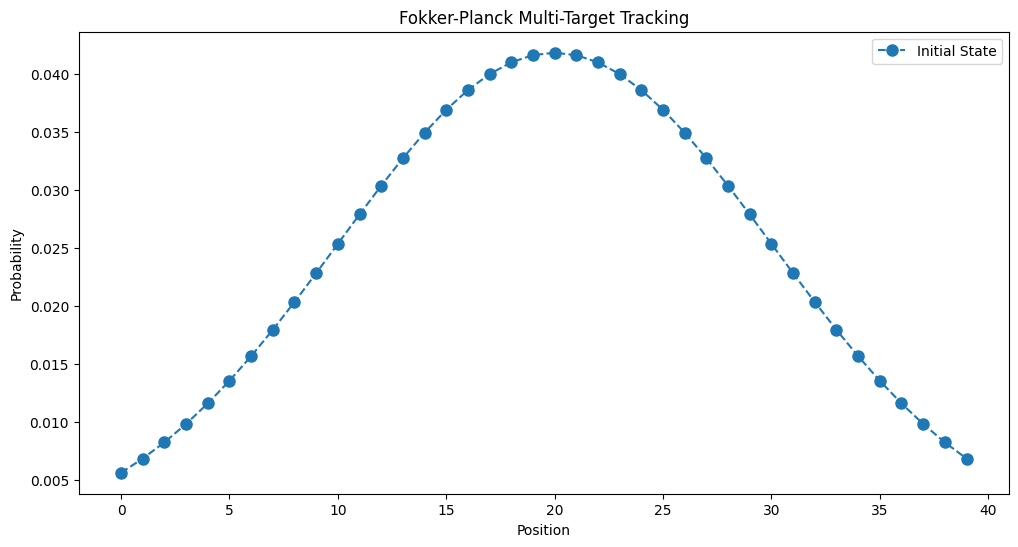

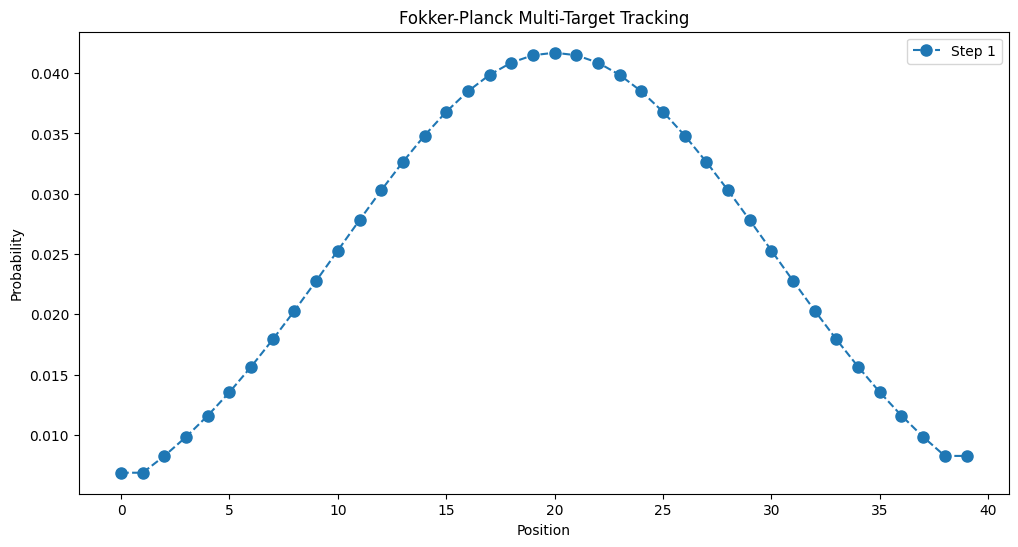

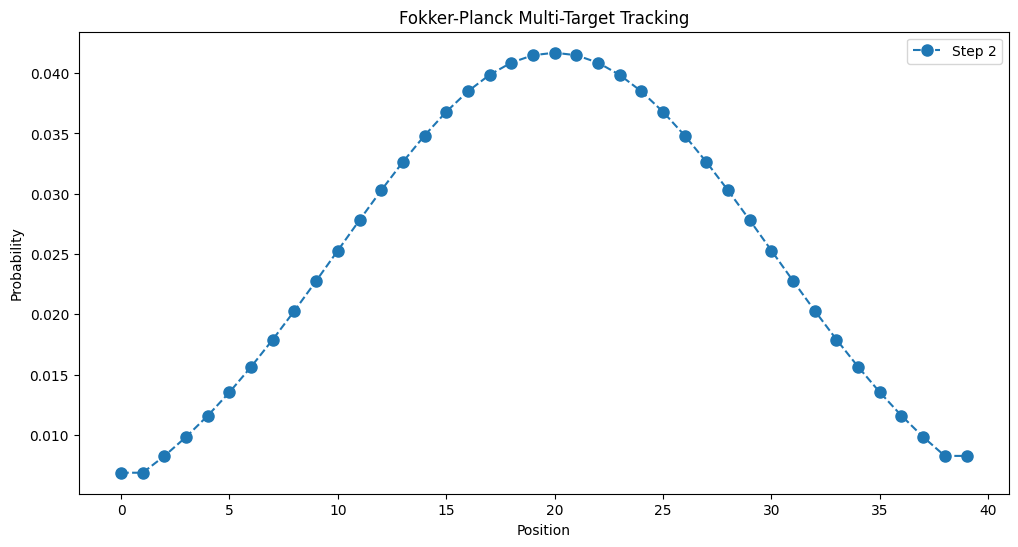

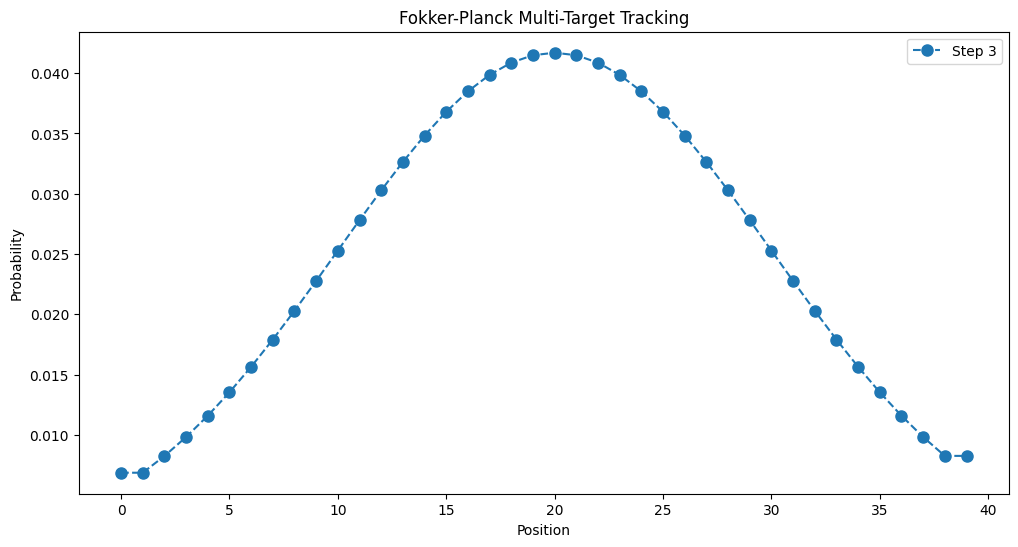

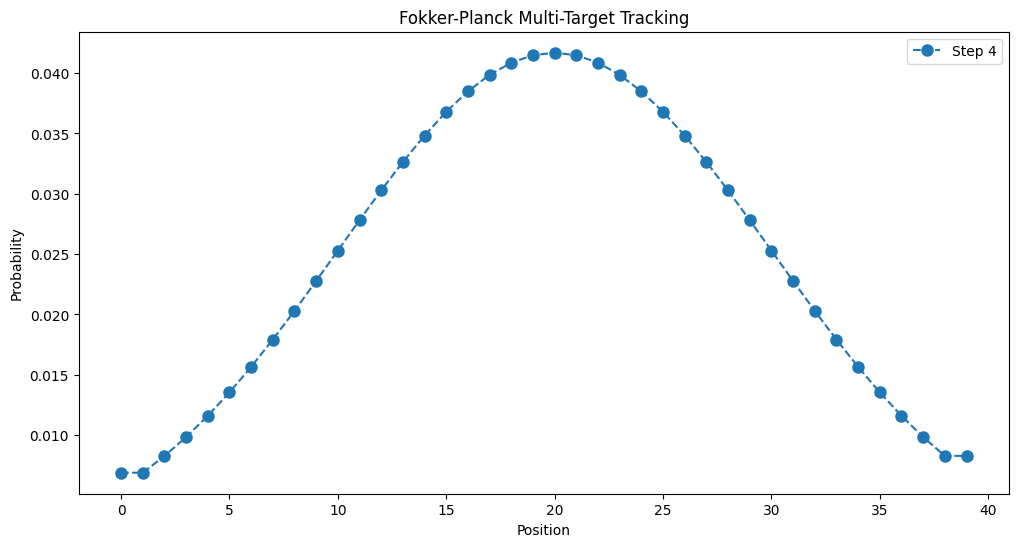

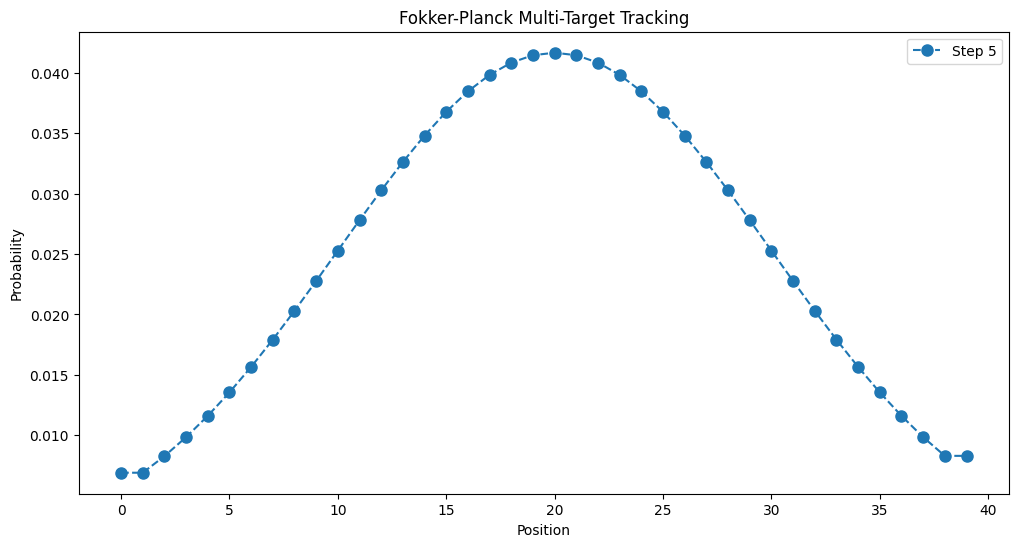

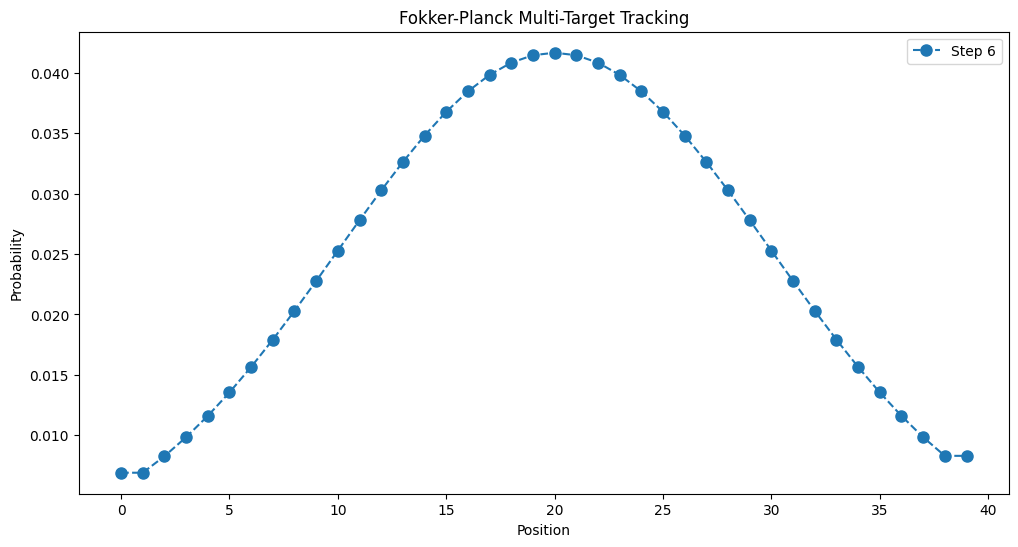

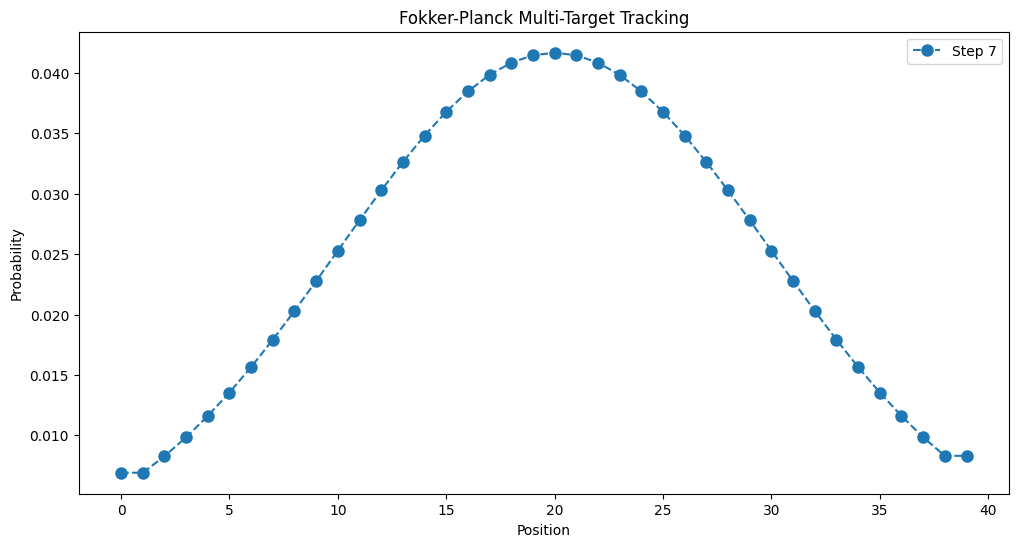

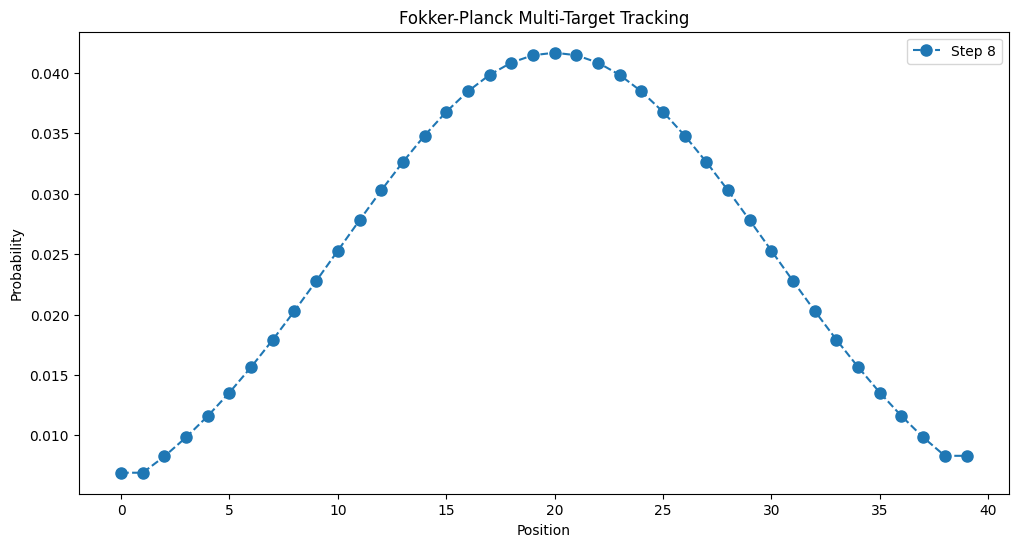

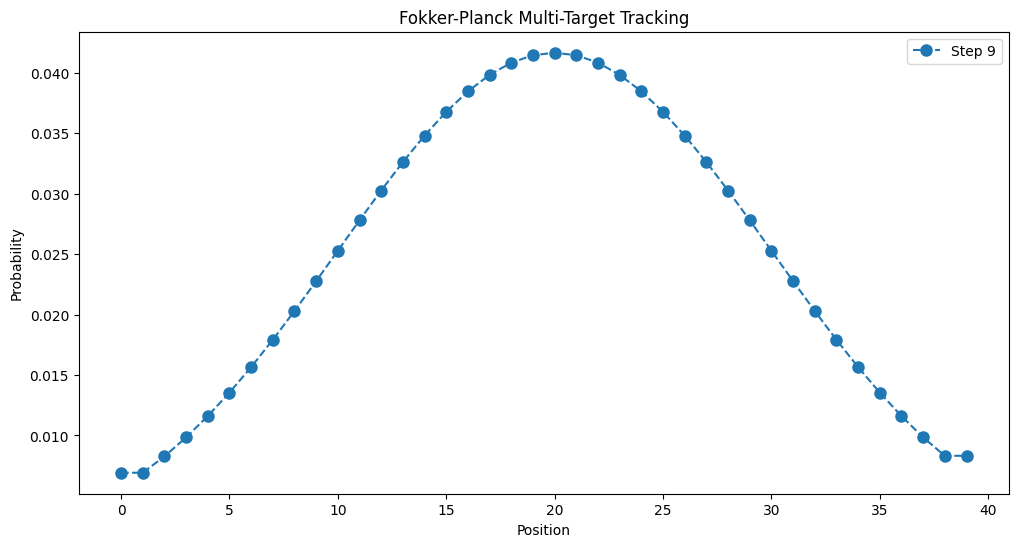

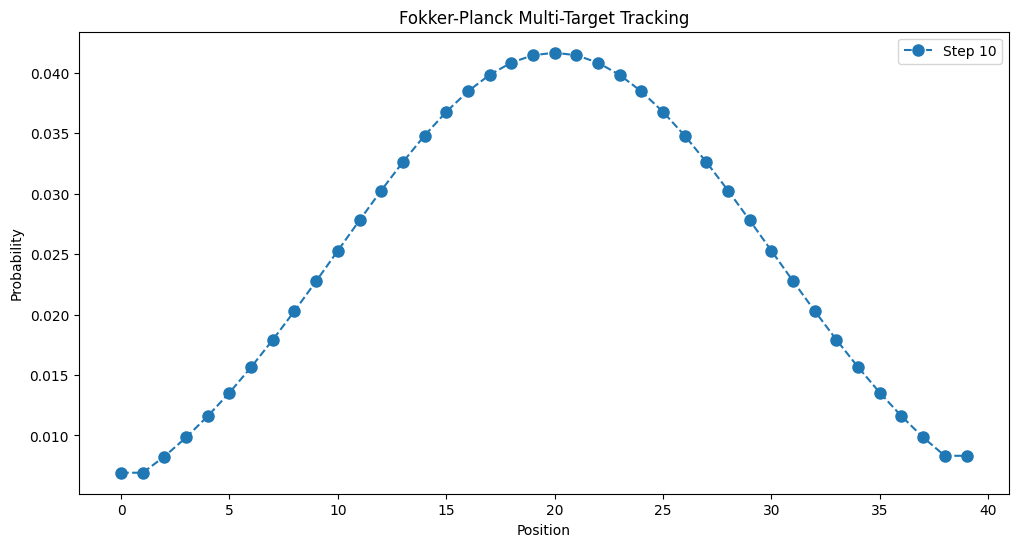

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def initial_state(num_positions):
    # Initial probability distribution (Gaussian)
    positions = np.arange(num_positions)
    initial_prob = np.exp(-0.5 * ((positions - num_positions / 2) / 10)**2)
    initial_prob /= np.sum(initial_prob)
    return initial_prob

def fokker_planck_update(prior_prob, diffusion, delta_t):
    # Discretized Fokker-Planck update
    num_positions = len(prior_prob)
    updated_prob = np.zeros_like(prior_prob)

    for i in range(1, num_positions - 1):
        updated_prob[i] = (
            prior_prob[i] + diffusion * delta_t / 2 * (prior_prob[i + 1] - 2 * prior_prob[i] + prior_prob[i - 1])
        )

    # Boundary conditions (reflective boundaries)
    updated_prob[0] = updated_prob[1]
    updated_prob[-1] = updated_prob[-2]

    # Normalize
    updated_prob /= np.sum(updated_prob)

    return updated_prob

# Simulation parameters
num_positions = 40
diffusion = 0.1
delta_t = 0.1
num_steps = 10

# Initialize
prior_prob = initial_state(num_positions)

# Plot the initial state
plt.figure(figsize=(12, 6))
plt.plot(np.arange(num_positions), prior_prob, label='Initial State', linestyle='--', marker='o', markersize=8)
plt.title('Fokker-Planck Multi-Target Tracking')
plt.xlabel('Position')
plt.ylabel('Probability')
plt.legend()
plt.show()

# Run the Fokker-Planck update cycle
for step in range(num_steps):
    # Fokker-Planck update
    prior_prob = fokker_planck_update(prior_prob, diffusion, delta_t)

    # Plot the results
    plt.figure(figsize=(12, 6))
    plt.plot(np.arange(num_positions), prior_prob, label=f'Step {step + 1}', linestyle='--', marker='o', markersize=8)
    plt.title('Fokker-Planck Multi-Target Tracking')
    plt.xlabel('Position')
    plt.ylabel('Probability')
    plt.legend()
    plt.show()


# 3. FPE multitracking


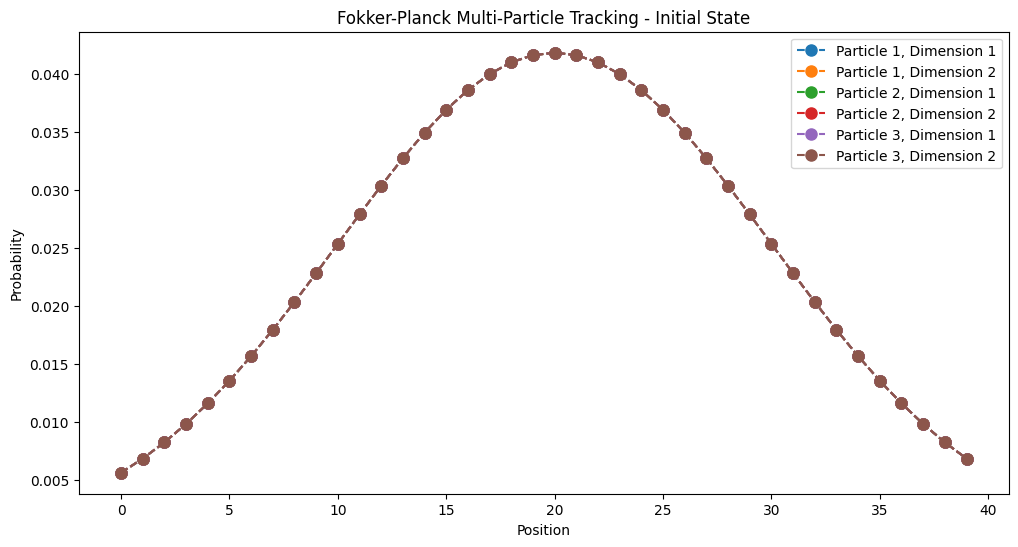

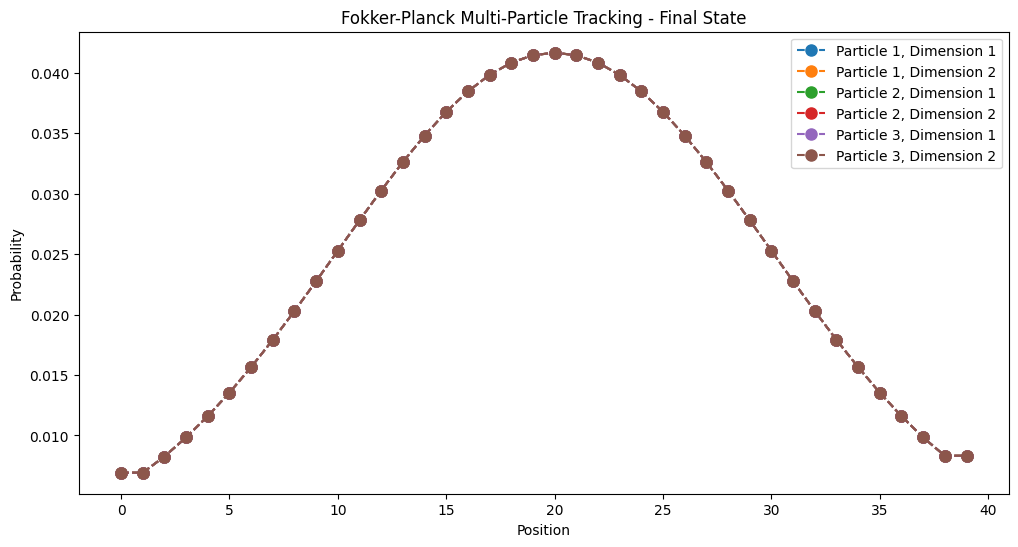

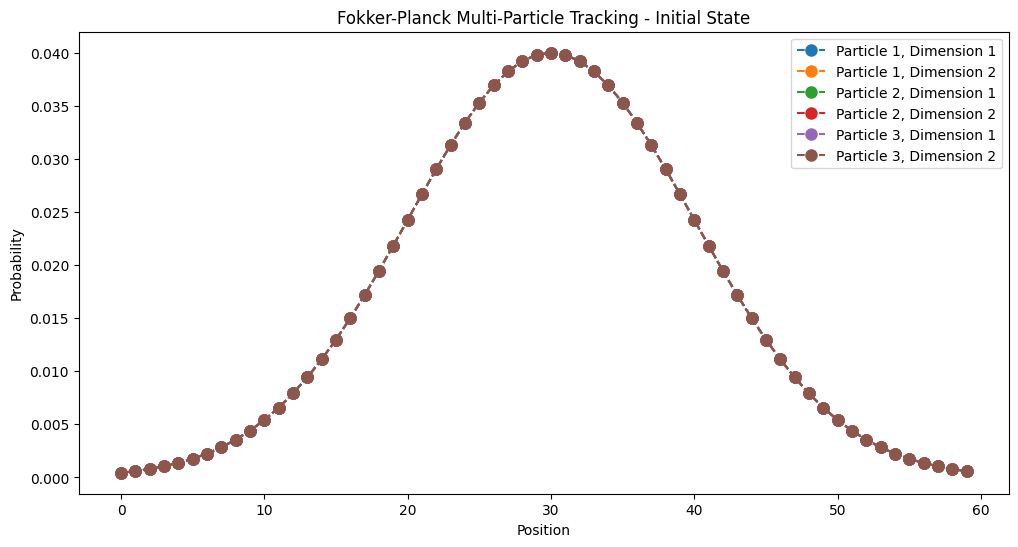

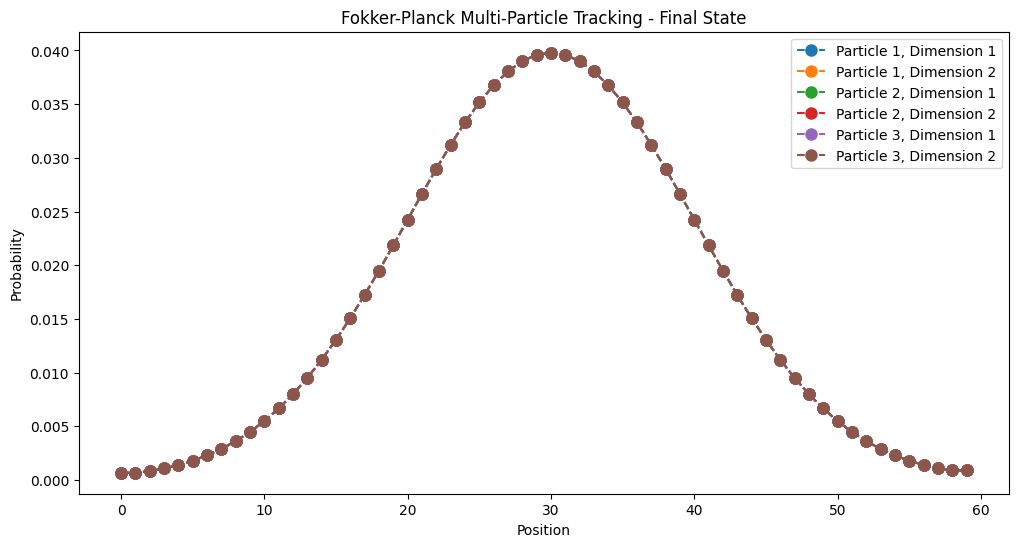

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def initial_state(num_positions, num_particles, num_dimensions):
    # Initial probability distribution (Gaussian) for multiple particles
    positions = np.arange(num_positions)
    initial_prob = np.zeros((num_particles, num_dimensions, num_positions))

    for i in range(num_particles):
        for d in range(num_dimensions):
            initial_prob[i, d, :] = np.exp(-0.5 * ((positions - num_positions / 2) / 10)**2)
            initial_prob[i, d, :] /= np.sum(initial_prob[i, d, :])

    return initial_prob

def fokker_planck_update(prior_probs, velocities, diffusion, delta_t):
    # Discretized Fokker-Planck update for multiple particles in multiple dimensions
    num_particles, num_dimensions, num_positions = prior_probs.shape
    updated_probs = np.zeros_like(prior_probs)

    for i in range(1, num_positions - 1):
        for j in range(num_particles):
            for k in range(num_dimensions):
                for velocity in velocities[j][k]:
                    updated_probs[j, k, i] += (
                        prior_probs[j, k, i] + diffusion * delta_t / 2 * (
                            prior_probs[j, k, i + 1] - 2 * prior_probs[j, k, i] + prior_probs[j, k, i - 1]
                        )
                    ) / len(velocities[j][k])

    # Boundary conditions (reflective boundaries)
    updated_probs[:, :, 0] = updated_probs[:, :, 1]
    updated_probs[:, :, -1] = updated_probs[:, :, -2]

    # Normalize
    updated_probs /= np.sum(updated_probs, axis=2, keepdims=True)

    return updated_probs

# Simulation parameters
num_positions = 40
diffusion = 0.1
delta_t = 0.1
num_steps = 10
num_particles = 3
num_dimensions = 2

# Initialize
prior_probs = initial_state(num_positions, num_particles, num_dimensions)
velocities = [[[1], [-0.5]], [[1, -1], [0.5, -0.5]], [[-1], [0.5]]]  # Velocities of particles in multiple dimensions

# Plot the initial state
plt.figure(figsize=(12, 6))
for i in range(num_particles):
    for j in range(num_dimensions):
        plt.plot(np.arange(num_positions), prior_probs[i, j, :], label=f'Particle {i+1}, Dimension {j+1}', linestyle='--', marker='o', markersize=8)
plt.title('Fokker-Planck Multi-Particle Tracking - Initial State')
plt.xlabel('Position')
plt.ylabel('Probability')
plt.legend()
plt.show()

# Run the Fokker-Planck update cycle for multiple particles
for step in range(num_steps):
    # Fokker-Planck update for multiple particles
    prior_probs = fokker_planck_update(prior_probs, velocities, diffusion, delta_t)

# Plot the final state
plt.figure(figsize=(12, 6))
for i in range(num_particles):
    for j in range(num_dimensions):
        plt.plot(np.arange(num_positions), prior_probs[i, j, :], label=f'Particle {i+1}, Dimension {j+1}', linestyle='--', marker='o', markersize=8)
plt.title('Fokker-Planck Multi-Particle Tracking - Final State')
plt.xlabel('Position')
plt.ylabel('Probability')
plt.legend()
plt.show()
import numpy as np
import matplotlib.pyplot as plt

def initial_state(num_positions, num_particles, num_dimensions):
    # Initial probability distribution (Gaussian) for multiple particles
    positions = np.arange(num_positions)
    initial_prob = np.zeros((num_particles, num_dimensions, num_positions))

    for i in range(num_particles):
        for d in range(num_dimensions):
            initial_prob[i, d, :] = np.exp(-0.5 * ((positions - num_positions / 2) / 10)**2)
            initial_prob[i, d, :] /= np.sum(initial_prob[i, d, :])

    return initial_prob

def fokker_planck_update(prior_probs, velocities, diffusion, delta_t):
    # Discretized Fokker-Planck update for multiple particles in multiple dimensions
    num_particles, num_dimensions, num_positions = prior_probs.shape
    updated_probs = np.zeros_like(prior_probs)

    for i in range(1, num_positions - 1):
        for j in range(num_particles):
            for k in range(num_dimensions):
                for velocity in velocities[j][k]:
                    updated_probs[j, k, i] += (
                        prior_probs[j, k, i] + diffusion * delta_t / 2 * (
                            prior_probs[j, k, i + 1] - 2 * prior_probs[j, k, i] + prior_probs[j, k, i - 1]
                        )
                    ) / len(velocities[j][k])

    # Boundary conditions (reflective boundaries)
    updated_probs[:, :, 0] = updated_probs[:, :, 1]
    updated_probs[:, :, -1] = updated_probs[:, :, -2]

    # Normalize
    updated_probs /= np.sum(updated_probs, axis=2, keepdims=True)

    return updated_probs

# Simulation parameters
num_positions = 60
diffusion = 0.1
delta_t = 0.1
num_steps = 100
num_particles = 3
num_dimensions = 2

# Initialize
prior_probs = initial_state(num_positions, num_particles, num_dimensions)
velocities = [[[1], [-0.5]], [[1, -1], [0.5, -0.5]], [[-1], [0.5]]]  # Velocities of particles in multiple dimensions

# Plot the initial state
plt.figure(figsize=(12, 6))
for i in range(num_particles):
    for j in range(num_dimensions):
        plt.plot(np.arange(num_positions), prior_probs[i, j, :], label=f'Particle {i+1}, Dimension {j+1}', linestyle='--', marker='o', markersize=8)
plt.title('Fokker-Planck Multi-Particle Tracking - Initial State')
plt.xlabel('Position')
plt.ylabel('Probability')
plt.legend()
plt.show()

# Run the Fokker-Planck update cycle for multiple particles
for step in range(num_steps):
    # Fokker-Planck update for multiple particles
    prior_probs = fokker_planck_update(prior_probs, velocities, diffusion, delta_t)

# Plot the final state
plt.figure(figsize=(12, 6))
for i in range(num_particles):
    for j in range(num_dimensions):
        plt.plot(np.arange(num_positions), prior_probs[i, j, :], label=f'Particle {i+1}, Dimension {j+1}', linestyle='--', marker='o', markersize=8)
plt.title('Fokker-Planck Multi-Particle Tracking - Final State')
plt.xlabel('Position')
plt.ylabel('Probability')
plt.legend()
plt.show()

